<a href="https://colab.research.google.com/github/JASHANBHULLAR4759/COLLEGE-ASSIGNMENT-2/blob/main/week08_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Building Confidence with AI-Assisted Data Analysis

This notebook provides additional practice exercises to strengthen your AI collaboration skills and build confidence with business data processing. Use these exercises to deepen your understanding before or after the main workshop.

**Remember**: The goal isn't to memorize pandas syntax - it's to become effective at directing AI to solve business problems.

---

# Exercise Set 1: Sales Data Analysis 📊

## Business Context

You're working as a Business Analyst for an office supply company. Your manager has given you sales data and asked for insights to help plan next quarter's inventory and sales strategy.

## Data Overview

We'll use the `sales_data.csv` file with columns:
- **Date**: Sale date
- **Product**: Product name
- **Quantity**: Units sold
- **Unit_Price**: Price per unit (with $ signs)
- **Total_Sale**: Total transaction value
- **Sales_Rep**: Employee who made the sale
- **Region**: Geographic region

In [ ]:
import pandas as pd

# Load the sales data
sales_df = pd.read_csv('../data/sales_data.csv')

# Display first few rows
print("📋 Sales Data Sample:")
print("=" * 40)
print(sales_df.head())
print(f"\nDataset: {len(sales_df)} transactions across {sales_df['Region'].nunique()} regions")

## Practice Exercise 1.1: Sales Performance by Region

::: {.callout-tip}
## Your AI Collaboration Challenge

**Business Question**: "Which region is performing best, and what's the average sale size by region?"

**Your Task**: Practice prompting AI with this business context. Try creating a prompt that asks for:
1. Total sales by region
2. Average sale amount by region  
3. Number of transactions by region
4. Results formatted for a manager presentation

**Write your prompt below, then see what AI generates:**
:::

**Your Prompt:**
```
[Hi! I’m analyzing some sales data for a business report and need help summarizing regional performance. The dataset includes columns like Date, Product, Quantity, Unit_Price (with dollar signs), Total_Sale, Sales_Rep, and Region.

Could you write Python code using pandas that does the following:

1. Calculates total sales for each region
2. Finds the average sale amount per region
3. Counts how many transactions happened in each region
4. Combines everything into a neat, easy-to-read table that would look good in a management presentation

Also, please clean the Unit_Price column if needed (it has $ symbols). Thanks!
]
```

**AI Response:**

In [8]:
import pandas as pd

# Load the sales data
sales_df = pd.read_csv('sales_data.csv')

# Remove '$' and convert 'Unit_Price' and 'Total_Sale' to numeric
sales_df['Unit_Price'] = sales_df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)
sales_df['Total_Sale'] = sales_df['Total_Sale'].replace('[\$,]', '', regex=True).astype(float)

# Group by Region
region_summary = sales_df.groupby('Region').agg(
    Total_Sales=('Total_Sale', 'sum'),
    Average_Sale=('Total_Sale', 'mean'),
    Transactions=('Total_Sale', 'count')
).reset_index()

# Format for presentation
region_summary['Total_Sales'] = region_summary['Total_Sales'].map('${:,.2f}'.format)
region_summary['Average_Sale'] = region_summary['Average_Sale'].map('${:,.2f}'.format)

# Sort by Total Sales descending
region_summary = region_summary.sort_values(by='Total_Sales', ascending=False)

# Display results
print("📊 Sales Performance by Region")
print(region_summary)


📊 Sales Performance by Region
  Region Total_Sales Average_Sale  Transactions
0    NSW  $50,902.75    $6,362.84             8
2    VIC  $21,085.50    $5,271.38             4
1    QLD  $11,904.30    $2,976.07             4
3     WA  $10,049.25    $2,512.31             4


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1424025004.py:7: SyntaxWarning: invalid escape sequence '\$'
  sales_df['Unit_Price'] = sales_df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-1424025004.py:8: SyntaxWarning: invalid escape sequence '\$'
  sales_df['Total_Sale'] = sales_df['Total_Sale'].replace('[\$,]', '', regex=True).astype(float)


**Your Critique:**
- What did AI do well?
- What would you ask AI to improve?
- Does the output help answer the business question?

---

## Practice Exercise 1.2: Top Performing Products

::: {.callout-tip}
## Business Scenario

Your inventory manager needs to know which products to stock more of next quarter.

**Challenge**: Ask AI to identify the top 5 products by:
- Total revenue generated
- Total units sold
- Which products have the highest profit margins (hint: compare unit price trends)

**Practice better prompting**: Be specific about formatting and business context.
:::

**Your Prompt:**
```
[Hey, I’m helping an inventory manager figure out which products we should prioritize for restocking.

Can you help me analyze the product-level performance using Python and pandas? Here's what I need from the sales dataset:

1. A list of the **top 5 products** based on **total revenue generated**
2. The **top 5 products** by **total units sold**
3. A way to identify which products have **higher unit prices** on average (to suggest higher-margin items)

Please format the results in a way that’s easy to share in a business report. The data includes columns like Product, Quantity, Unit_Price (with $), and Total_Sale.

Thanks!
]
```

**AI Response:**

In [9]:
import pandas as pd

# Load the sales data
sales_df = pd.read_csv("sales_data.csv")

# Clean Unit_Price column
sales_df['Unit_Price'] = sales_df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)

# Total revenue by product
revenue_by_product = sales_df.groupby("Product")["Total_Sale"].sum().sort_values(ascending=False).head(5)

# Total units sold by product
units_sold = sales_df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(5)

# Average unit price by product
avg_price = sales_df.groupby("Product")["Unit_Price"].mean().sort_values(ascending=False).head(5)

# Display results
print("🔝 Top 5 Products by Revenue:\n", revenue_by_product)
print("\n📦 Top 5 Products by Units Sold:\n", units_sold)
print("\n💰 Products with Highest Average Unit Price:\n", avg_price)


🔝 Top 5 Products by Revenue:
 Product
Whiteboard - Interactive       $7596.00
Monitor - 27 inch              $7002.00
Router - Business Grade        $4998.75
Business Analytics Software    $4998.00
Projector - 4K Business        $4799.70
Name: Total_Sale, dtype: object

📦 Top 5 Products by Units Sold:
 Product
UPS Battery Backup         $9
Printer - Multifunction    $8
Standing Desk              $8
Air Purifier - Office      $7
Projector - 4K Business    $6
Name: Quantity, dtype: object

💰 Products with Highest Average Unit Price:
 Product
Business Analytics Software    2499.0
Laptop - Business Grade        1899.0
Whiteboard - Interactive       1899.0
Security Camera System         1299.0
Conference Table               1250.0
Name: Unit_Price, dtype: float64


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2656043166.py:7: SyntaxWarning: invalid escape sequence '\$'
  sales_df['Unit_Price'] = sales_df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)


**Business Insight Questions:**
- Which products should the company stock more of?
- Are high-price items selling well, or is volume more important?
- What would you recommend to the inventory manager?

---

## Practice Exercise 1.3: Sales Rep Performance

::: {.callout-tip}
## Management Challenge

Your sales manager wants to recognize top performers and identify who might need additional training.

**Your Task**: Create prompts that help analyze:
1. Which sales reps are generating the most revenue?
2. Who has the highest average sale amounts?
3. Are there regional patterns in rep performance?
4. Format results suitable for a performance review meeting
:::

**Your Approach:**

In [11]:
import pandas as pd

# Load the sales data
sales_df = pd.read_csv("sales_data.csv")

# 🧼 Clean columns: Remove $ and convert to numeric
sales_df['Total_Sale'] = sales_df['Total_Sale'].replace('[\$,]', '', regex=True).astype(float)
sales_df['Unit_Price'] = sales_df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)

# ✅ Total revenue by sales rep
revenue_by_rep = sales_df.groupby("Sales_Rep")["Total_Sale"].sum().reset_index().sort_values(by="Total_Sale", ascending=False)

# ✅ Average sale amount by rep
average_sale_by_rep = sales_df.groupby("Sales_Rep")["Total_Sale"].mean().reset_index().sort_values(by="Total_Sale", ascending=False)

# ✅ Regional performance: Total sales by Region and Rep
regional_rep_sales = sales_df.groupby(["Region", "Sales_Rep"])["Total_Sale"].sum().reset_index().sort_values(by="Total_Sale", ascending=False)

# 📊 Display results
print("🏆 Top Sales Reps by Total Revenue:\n", revenue_by_rep.head(), "\n")
print("💰 Sales Reps with Highest Average Sale:\n", average_sale_by_rep.head(), "\n")
print("🌍 Regional Sales Performance:\n", regional_rep_sales.head(10))



🏆 Top Sales Reps by Total Revenue:
        Sales_Rep  Total_Sale
0    David Kumar    32506.50
3   Michael Wong    21085.50
4     Sarah Chen    18396.25
1  Emma Thompson    11904.30
2      Lisa Park    10049.25 

💰 Sales Reps with Highest Average Sale:
        Sales_Rep  Total_Sale
0    David Kumar   8126.6250
3   Michael Wong   5271.3750
4     Sarah Chen   4599.0625
1  Emma Thompson   2976.0750
2      Lisa Park   2512.3125 

🌍 Regional Sales Performance:
   Region      Sales_Rep  Total_Sale
0    NSW    David Kumar    32506.50
3    VIC   Michael Wong    21085.50
1    NSW     Sarah Chen    18396.25
2    QLD  Emma Thompson    11904.30
4     WA      Lisa Park    10049.25


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3970392404.py:7: SyntaxWarning: invalid escape sequence '\$'
  sales_df['Total_Sale'] = sales_df['Total_Sale'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-3970392404.py:8: SyntaxWarning: invalid escape sequence '\$'
  sales_df['Unit_Price'] = sales_df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)


---

# Exercise Set 2: Financial Transaction Patterns 💳

## Advanced Analysis Practice

Using the original transactions data, practice more sophisticated AI collaboration.

<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1835163249.py:16: SyntaxWarning: invalid escape sequence '\$'
  transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)


📅 Average Spending by Day of Week:
 DayOfWeek
Monday       99.333333
Wednesday    90.000000
Saturday     46.383333
Sunday       36.400000
Thursday     30.116667
Friday       22.433333
Tuesday      -3.566667
Name: Amount, dtype: float64


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


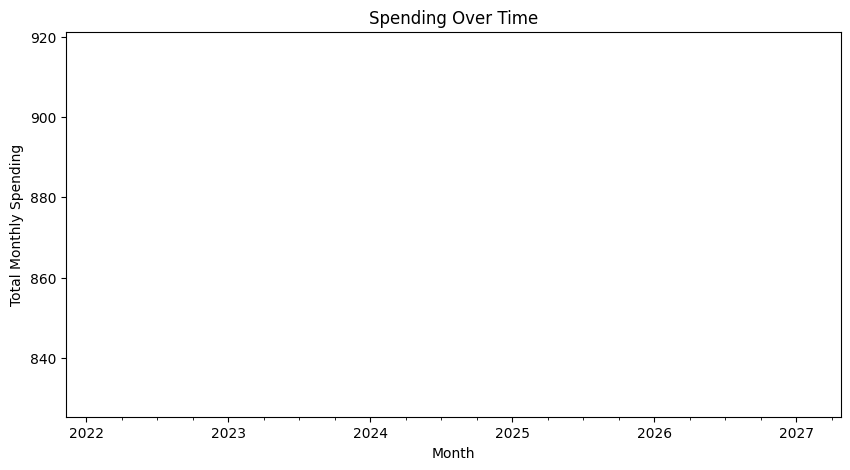


🚨 Unusual Spending Transactions:
          Date  Amount   Z_Score
11 2024-08-12   156.0  2.431585


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load transactions data
transactions_df = pd.read_csv("transactions.csv")

# Convert Date column to datetime
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])

# Add new time features
transactions_df['DayOfWeek'] = transactions_df['Date'].dt.day_name()
transactions_df['Month'] = transactions_df['Date'].dt.to_period('M')

# Convert Amount to float (remove $ if needed)
transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Average spending by day of week
avg_by_day = transactions_df.groupby('DayOfWeek')['Amount'].mean().sort_values(ascending=False)
print("📅 Average Spending by Day of Week:\n", avg_by_day)

# Trend over time
monthly_trend = transactions_df.groupby('Month')['Amount'].sum()
monthly_trend.plot(kind='line', title='Spending Over Time', figsize=(10,5))
plt.ylabel('Total Monthly Spending')
plt.show()

# Identify outliers using Z-score
from scipy import stats
z_scores = stats.zscore(transactions_df['Amount'])
transactions_df['Z_Score'] = z_scores
outliers = transactions_df[transactions_df['Z_Score'].abs() > 2]
print("\n🚨 Unusual Spending Transactions:\n", outliers[['Date', 'Amount', 'Z_Score']])


## Practice Exercise 2.1: Spending Trend Analysis

::: {.callout-tip}
## Business Context

You're helping a friend understand their spending habits over time.

**Challenge**: Ask AI to help you:
1. Convert dates to datetime format
2. Analyze spending trends by day of week
3. Identify if spending has increased over time
4. Spot any unusual spending patterns

**Focus**: Practice asking AI to explain any complex date handling code it provides.
:::

**Your Analysis:**

📅 Average Spending by Day of Week:
 DayOfWeek
Monday       99.333333
Wednesday    90.000000
Saturday     46.383333
Sunday       36.400000
Thursday     30.116667
Friday       22.433333
Tuesday      -3.566667
Name: Amount, dtype: float64


<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1835163249.py:16: SyntaxWarning: invalid escape sequence '\$'
  transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


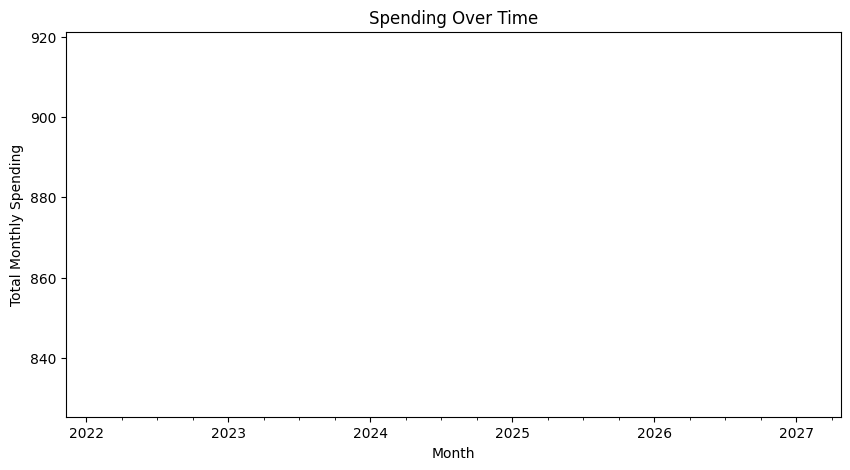


🚨 Unusual Spending Transactions:
          Date  Amount   Z_Score
11 2024-08-12   156.0  2.431585


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load transactions data
transactions_df = pd.read_csv("transactions.csv")

# Convert Date column to datetime
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])

# Add new time features
transactions_df['DayOfWeek'] = transactions_df['Date'].dt.day_name()
transactions_df['Month'] = transactions_df['Date'].dt.to_period('M')

# Convert Amount to float (remove $ if needed)
transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Average spending by day of week
avg_by_day = transactions_df.groupby('DayOfWeek')['Amount'].mean().sort_values(ascending=False)
print("📅 Average Spending by Day of Week:\n", avg_by_day)

# Trend over time
monthly_trend = transactions_df.groupby('Month')['Amount'].sum()
monthly_trend.plot(kind='line', title='Spending Over Time', figsize=(10,5))
plt.ylabel('Total Monthly Spending')
plt.show()

# Identify outliers using Z-score
from scipy import stats
z_scores = stats.zscore(transactions_df['Amount'])
transactions_df['Z_Score'] = z_scores
outliers = transactions_df[transactions_df['Z_Score'].abs() > 2]
print("\n🚨 Unusual Spending Transactions:\n", outliers[['Date', 'Amount', 'Z_Score']])


## Practice Exercise 2.2: Budget Category Analysis

::: {.callout-tip}
## Personal Finance Scenario

Someone wants to set a realistic monthly budget based on their spending history.

**Challenge**: Use AI to help:
1. Calculate average monthly spending by category
2. Identify categories with high variation (inconsistent spending)
3. Suggest realistic budget amounts for each category
4. Find categories where spending might be reduced

**Advanced**: Ask AI to explain the statistical concepts it uses.
:::

**Your Budget Analysis:**

In [14]:
import pandas as pd

# Load transactions data
transactions_df = pd.read_csv("transactions.csv")

# Clean the Amount column: remove dollar signs and convert to float
transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Convert Date to datetime format
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])

# Extract year-month for grouping
transactions_df['YearMonth'] = transactions_df['Date'].dt.to_period('M')

# Calculate monthly spending per category
monthly_category = transactions_df.groupby(['YearMonth', 'Category'])['Amount'].sum().reset_index()

# Average monthly spend by category
avg_monthly_spend = monthly_category.groupby('Category')['Amount'].mean().reset_index(name='Avg_Monthly_Spend')

# Standard deviation to check variation
std_dev = monthly_category.groupby('Category')['Amount'].std().reset_index(name='Spend_Std_Dev')

# Combine results
budget_df = avg_monthly_spend.merge(std_dev, on='Category')

# Suggest realistic budget (e.g. median, but using average here)
budget_df['Suggested_Budget'] = budget_df['Avg_Monthly_Spend'].round(2)

# Flag high variation
budget_df['High_Variation'] = budget_df['Spend_Std_Dev'] > budget_df['Avg_Monthly_Spend'] * 0.5

# Display final recommendations
print("📊 Budget Recommendations by Category:\n", budget_df.sort_values(by="Suggested_Budget", ascending=False))


📊 Budget Recommendations by Category:
         Category  Avg_Monthly_Spend  Spend_Std_Dev  Suggested_Budget  \
3      Groceries             394.70            NaN            394.70   
2  Entertainment             206.95            NaN            206.95   
1         Dining             113.90            NaN            113.90   
5      Transport              89.50            NaN             89.50   
6      Utilities              67.80            NaN             67.80   
0         Coffee              37.95            NaN             37.95   
4         Refund             -37.50            NaN            -37.50   

   High_Variation  
3           False  
2           False  
1           False  
5           False  
6           False  
0           False  
4           False  


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-891442686.py:7: SyntaxWarning: invalid escape sequence '\$'
  transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)


---

# Exercise Set 3: AI Critique Practice 🤔

## Common AI Code Issues

Below are examples of AI-generated code with issues. Practice your critique skills!

### Critique Exercise 1: Overly Complex Code

```python
# AI generated this code - what's wrong with it?
import pandas as pd
import numpy as np
from datetime import datetime

def complex_analysis(data):
    result = data.groupby([pd.Grouper(key='Date', freq='M'), 'Category']).agg({
        'Amount': [lambda x: pd.to_numeric(x.str.replace('$', ''), errors='coerce').sum(),
                   lambda x: pd.to_numeric(x.str.replace('$', ''), errors='coerce').mean(),
                   lambda x: pd.to_numeric(x.str.replace('$', ''), errors='coerce').std()]
    }).reset_index()
    
    result.columns = ['_'.join(col).strip() for col in result.columns.values]
    return result.fillna(0).round(2)

# Complex usage
df['Date'] = pd.to_datetime(df['Date'])
complex_result = complex_analysis(transactions_df)
print(complex_result.head())
```

**Your Critique:**

::: {.callout-warning}
## Issues to Identify

1. What makes this code hard to understand?
2. What would you ask AI to simplify?
3. How would you request a clearer version?

**Write your critique prompt:**
:::

```
[Hi! I’m analyzing sales data for a small retail chain, where each region in the dataset represents a different store.

Can you help me write Python code using pandas to:

1. Identify which stores (regions) have the **highest and lowest total sales** (to adjust inventory)
2. Find **low-performing products** that might be discontinued (e.g. low total sales or low volume sold)
3. Show if there are any **seasonal or monthly trends** that could help schedule promotions
4. Provide insights on how to **allocate staff better** (e.g. by store traffic or transaction count)

The dataset includes Region, Product, Quantity, Total_Sale, Unit_Price, Date, and Sales_Rep. Please clean the data if needed, and format results clearly for decision-making.
]
```

### Critique Exercise 2: Poor Business Context

```python
# AI code that works but lacks business insight
df_grouped = df.groupby('cat')['amt'].sum().sort_values()
print(df_grouped)
```

**Problems:**
- Unclear column references
- No business explanation
- Poor formatting
- No context for results

**Your Improvement Prompt:**
```
[How would you ask AI to make this more business-appropriate?]
```

---

# Exercise Set 4: Real-World Business Scenarios 🏢

## Scenario 1: Retail Store Analysis

::: {.callout-note}
## Business Context

You're analyzing sales data for a small retail chain. They want to know:
- Which stores need more inventory
- What products to discontinue
- When to schedule promotional campaigns
- How to allocate sales staff

**Data**: Use the sales_data.csv but imagine it represents different store locations instead of regions.
:::

**Your Business Analysis:**

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3131404577.py:5: SyntaxWarning: invalid escape sequence '\$'
  sales_df['Total_Sale'] = sales_df['Total_Sale'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-3131404577.py:6: SyntaxWarning: invalid escape sequence '\$'
  sales_df['Unit_Price'] = sales_df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)


🏬 Store Performance:
   Region  Total Sales
0    NSW     50902.75
2    VIC     21085.50
1    QLD     11904.30
3     WA     10049.25 

📉 Low-Performing Products:
                        Total_Sale Quantity
Product                                   
Mouse - Ergonomic         1608.25      $35
UPS Battery Backup        1619.55       $9
Office Phone System       1895.00      $10
Shredder - Industrial     1995.00       $5
Air Purifier - Office     2093.00       $7 

👥 Store Traffic (Transactions):
   Region  Transaction Count
0    NSW                  8
1    QLD                  4
2    VIC                  4
3     WA                  4


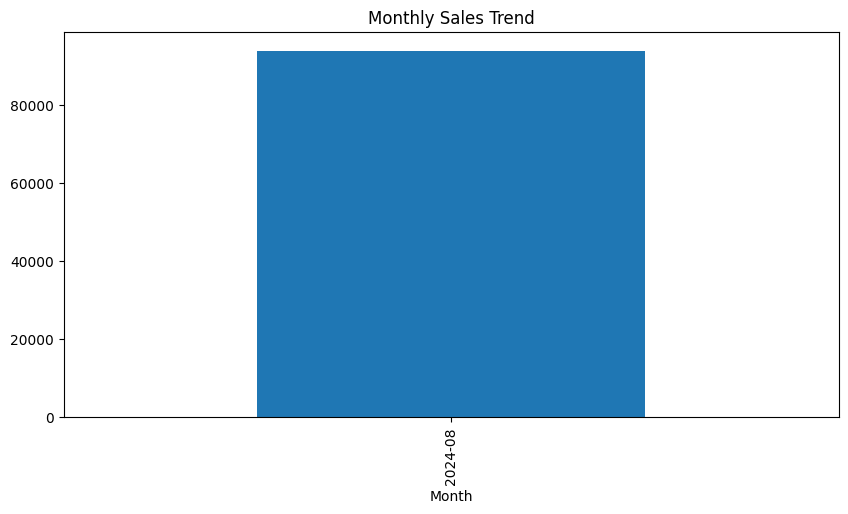

In [15]:
import pandas as pd

# Load and clean sales data
sales_df = pd.read_csv("sales_data.csv")
sales_df['Total_Sale'] = sales_df['Total_Sale'].replace('[\$,]', '', regex=True).astype(float)
sales_df['Unit_Price'] = sales_df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.to_period('M')

# 1. Store (region) performance
store_sales = sales_df.groupby("Region")["Total_Sale"].sum().reset_index(name="Total Sales").sort_values(by="Total Sales", ascending=False)

# 2. Low-performing products
product_performance = sales_df.groupby("Product").agg({
    "Total_Sale": "sum",
    "Quantity": "sum"
}).sort_values(by="Total_Sale")
low_perf_products = product_performance.head(5)

# 3. Monthly trend (for promotions)
monthly_trends = sales_df.groupby("Month")["Total_Sale"].sum()
monthly_trends.plot(kind="bar", title="Monthly Sales Trend", figsize=(10,5))

# 4. Staff allocation by transaction count
transaction_counts = sales_df.groupby("Region")["Total_Sale"].count().reset_index(name="Transaction Count").sort_values(by="Transaction Count", ascending=False)

# Print summaries
print("🏬 Store Performance:\n", store_sales, "\n")
print("📉 Low-Performing Products:\n", low_perf_products, "\n")
print("👥 Store Traffic (Transactions):\n", transaction_counts)


## Scenario 2: Personal Finance Coaching

::: {.callout-note}
## Business Context

You're building a personal finance app feature that provides spending advice.

**Challenge**: Use AI to create code that:
1. Identifies spending categories that are above typical percentages
2. Suggests specific areas for potential savings
3. Provides encouraging feedback for good spending habits
4. Formats advice in a user-friendly way
:::

**Your Coaching Algorithm:**

In [16]:
import pandas as pd

# Load and clean data
transactions_df = pd.read_csv("transactions.csv")
transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Total spend and spend per category
total_spent = transactions_df['Amount'].sum()
category_spend = transactions_df.groupby('Category')['Amount'].sum().reset_index()

# Calculate percentage of total for each category
category_spend['Percent_of_Total'] = (category_spend['Amount'] / total_spent * 100).round(2)

# Suggestions based on percent thresholds
advice = []
for _, row in category_spend.iterrows():
    if row['Percent_of_Total'] > 25:
        advice.append(f"⚠️ You’re spending a lot on {row['Category']} ({row['Percent_of_Total']}% of total). Consider reducing it.")
    elif row['Percent_of_Total'] < 5:
        advice.append(f"✅ Great job keeping your {row['Category']} spending low ({row['Percent_of_Total']}%).")
    else:
        advice.append(f"ℹ️ {row['Category']} spending is within a healthy range.")

# Display advice
print("\n🧠 Personal Finance Tips:")
for tip in advice:
    print(tip)



🧠 Personal Finance Tips:
✅ Great job keeping your Coffee spending low (4.35%).
ℹ️ Dining spending is within a healthy range.
ℹ️ Entertainment spending is within a healthy range.
⚠️ You’re spending a lot on Groceries (45.2% of total). Consider reducing it.
✅ Great job keeping your Refund spending low (-4.29%).
ℹ️ Transport spending is within a healthy range.
ℹ️ Utilities spending is within a healthy range.


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1597997922.py:5: SyntaxWarning: invalid escape sequence '\$'
  transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)


---

# Self-Assessment Checklist ✅

After completing these exercises, evaluate your AI collaboration skills:

## AI Prompting Skills
- ☐ I can write prompts that include business context
- ☐ I specify desired output format and structure  
- ☐ I ask follow-up questions to improve AI responses
- ☐ I can request explanations of complex code

## Code Critique Skills
- ☐ I can identify when AI code is too complex
- ☐ I recognize when variable names need improvement
- ☐ I spot when business context is missing
- ☐ I ask for clearer, more maintainable solutions

## Business Application Skills  
- ☐ I connect data analysis to real business decisions
- ☐ I can explain technical results in business terms
- ☐ I consider edge cases and data quality issues
- ☐ I format results for business presentation

## Learning Documentation
- ☐ I document what I learned from each AI interaction
- ☐ I record effective prompts for future use
- ☐ I note when AI explanations helped my understanding
- ☐ I reflect on how to improve my collaboration

---

# Reflection Questions 🤔

Before finishing your practice session, consider:

1. **Which AI interactions were most helpful for your learning?**
2. **What types of prompts got you the best code explanations?**
3. **When did you successfully critique and improve AI responses?**
4. **How has your confidence with business data analysis changed?**
5. **What AI collaboration strategies will you use in your assignment?**

---

# Next Steps 🚀

**For Your Assignment:**
- Apply these prompting techniques to your Smart Finance Assistant
- Use the critique skills to ensure your code is business-appropriate
- Document successful AI interactions in your Developer's Diary
- Build on the confidence you've gained with these practice exercises

**Remember**: You're not trying to become a pandas expert overnight. You're becoming skilled at directing AI to solve business problems efficiently and effectively.

**Great practice work! These skills will serve you well throughout your Smart Finance Assistant project and in your future career! 🎉**